In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [8]:
file_path = "C:\\Users\\samoliver.areh\\Downloads\\USDSGD.xlsx"
usdsgd = pd.read_excel(file_path)
print(usdsgd)

     Range From   Range To  Currency From  Currency To  Ask Price  Bid Price  \
0              9          9            USD         SGD     1.3678     1.3673   
1             13         13            USD         SGD     1.3693     1.3688   
2              9          9            USD         SGD     1.3739     1.3738   
3             13         13            USD         SGD     1.3754     1.3749   
4              9          9            USD         SGD     1.3737     1.3732   
..           ...        ...            ...         ...        ...        ...   
125           13         13            USD         SGD     1.3236     1.3228   
126            9          9            USD         SGD     1.3193     1.3188   
127           13         13            USD         SGD     1.3183     1.3176   
128            9          9            USD         SGD     1.3194     1.3193   
129           13         13            USD         SGD     1.3182     1.3174   

     Mid Price  Ask Change  Bid Change 

In [9]:
usdsgd.head()

,Range From,Range To,Currency From,Currency To,Ask Price,Bid Price,Mid Price,Ask Change,Bid Change,Mid Change
0,9,9,USD,SGD,1.3678,1.3673,1.36755,0.124287,0.124333,0.124310
1,13,13,USD,SGD,1.3693,1.3688,1.36905,0.109545,0.109585,0.109565
2,9,9,USD,SGD,1.3739,1.3738,1.37385,0.058228,0.087349,0.072788
3,13,13,USD,SGD,1.3754,1.3749,1.37515,0.109059,0.080006,0.094535
4,9,9,USD,SGD,1.3737,1.3732,1.37345,0.021839,0.021847,0.021843


Text(0, 0.5, 'Sales')

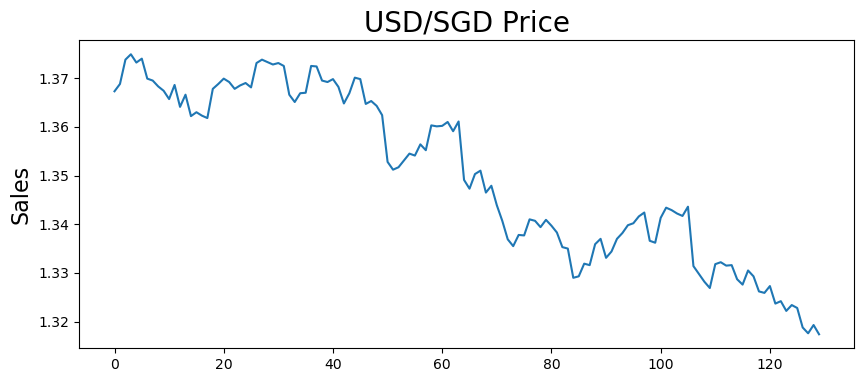

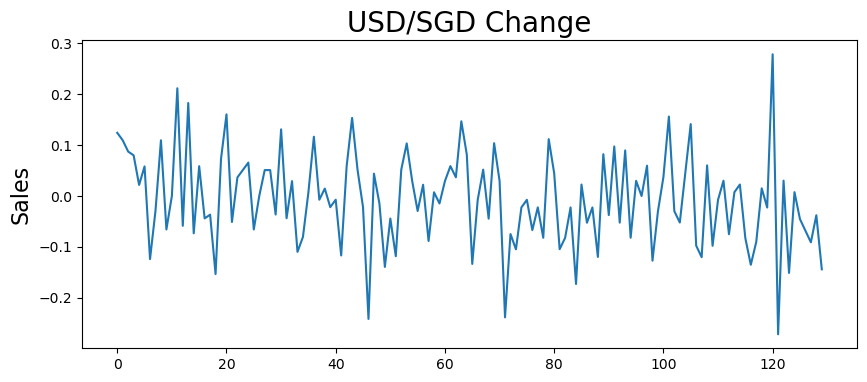

In [15]:
plt.figure(figsize=(10,4))
plt.plot(usdsgd['Bid Price'])
plt.title('USD/SGD Price', fontsize=20)
plt.ylabel('Sales', fontsize=16)

plt.figure(figsize=(10,4))
plt.plot(usdsgd['Bid Change'])
plt.title('USD/SGD Change', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [108]:
split_index = int(len(usdsgd) * 0.8)
data_train = usdsgd[:split_index]
data_test = usdsgd[split_index:]

data_train.head

<bound method NDFrame.head of      Range From   Range To  Currency From  Currency To  Ask Price  Bid Price  \
0              9          9            USD         SGD     1.3678     1.3673   
1             13         13            USD         SGD     1.3693     1.3688   
2              9          9            USD         SGD     1.3739     1.3738   
3             13         13            USD         SGD     1.3754     1.3749   
4              9          9            USD         SGD     1.3737     1.3732   
..           ...        ...            ...         ...        ...        ...   
99            13         13            USD         SGD     1.3367     1.3362   
100            9          9            USD         SGD     1.3418     1.3413   
101           13         13            USD         SGD     1.3435     1.3434   
102            9          9            USD         SGD     1.3437     1.3429   
103           13         13            USD         SGD     1.3430     1.3422   

     Mid 

In [158]:
model = ARIMA(data_train['Bid Change'], order=(3,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Bid Change   No. Observations:                  104
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 103.804
Date:                Thu, 21 Mar 2024   AIC                           -197.608
Time:                        16:49:08   BIC                           -184.434
Sample:                             0   HQIC                          -192.272
                                - 104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0528      0.131     -0.404      0.686      -0.309       0.203
ar.L2         -0.0079      0.105     -0.075      0.940      -0.215       0.199
ar.L3         -0.1039      0.096     -1.080      0.2

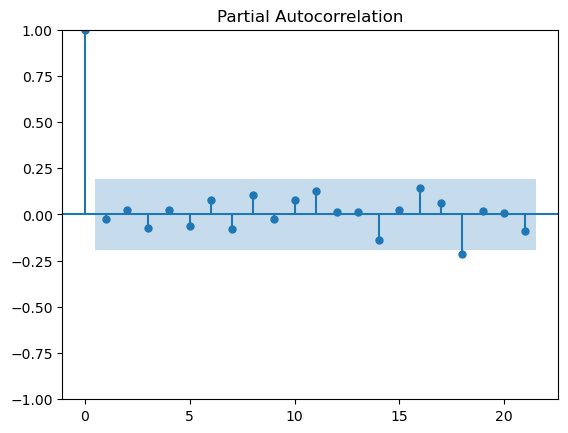

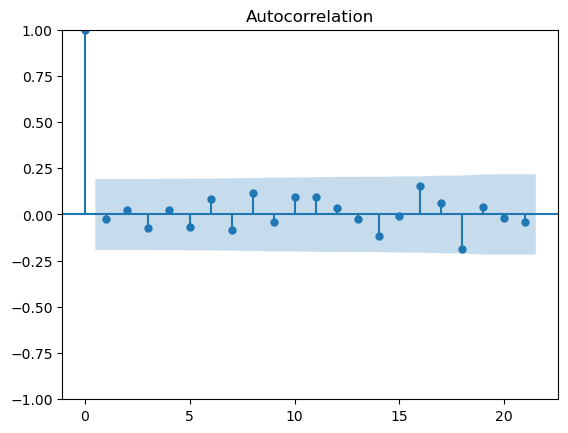

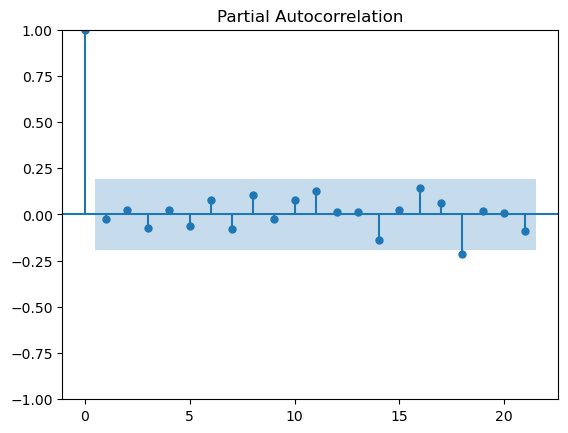

In [159]:
plot_acf(data_train['Bid Change'])
plot_pacf(data_train['Bid Change'])

In [160]:
predictions = model_fit.forecast(len(data_test))
predictions = pd.Series(predictions, index=data_test.index)
residuals = data_test['Bid Change'] - predictions

Text(0, 0.5, 'Error')

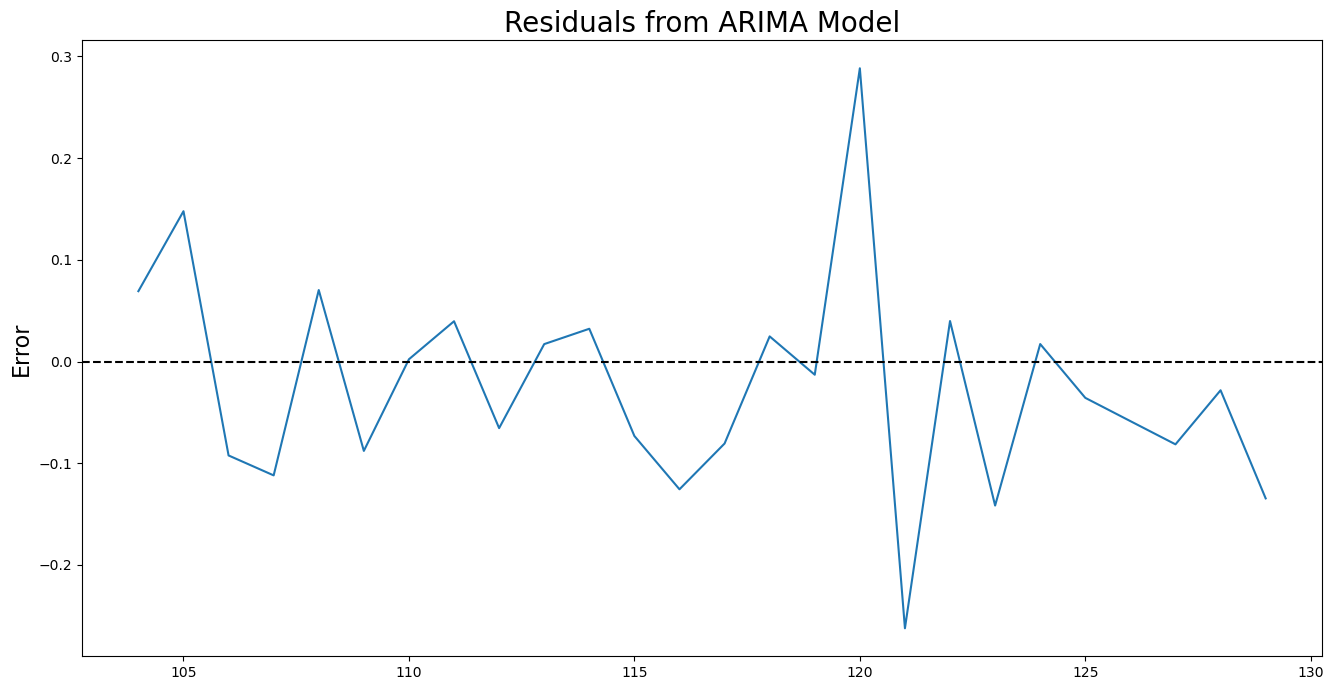

In [174]:
plt.figure(figsize=(16,8))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [162]:
predictions

104   -0.024470
105   -0.006417
106   -0.005265
107   -0.008345
108   -0.010068
109   -0.010072
110   -0.009738
111   -0.009577
112   -0.009588
113   -0.009623
114   -0.009638
115   -0.009636
116   -0.009632
117   -0.009631
118   -0.009631
119   -0.009631
120   -0.009631
121   -0.009631
122   -0.009631
123   -0.009631
124   -0.009631
125   -0.009631
126   -0.009631
127   -0.009631
128   -0.009631
129   -0.009631
Name: predicted_mean, dtype: float64

Text(0, 0.5, 'Change')

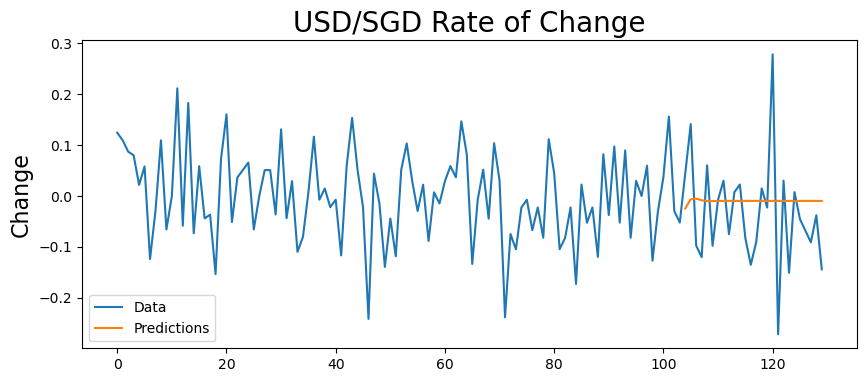

In [173]:
plt.figure(figsize=(10,4))

plt.plot(usdsgd['Bid Change'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=10)

plt.title('USD/SGD Rate of Change', fontsize=20)
plt.ylabel('Change', fontsize=16)

In [165]:
from pmdarima import auto_arima

In [166]:
auto = auto_arima(data_train['Bid Change'], trace = True, suppres_warnings = True)
print(auto.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-202.326, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-208.939, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-207.002, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-206.999, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-210.939, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-206.324, Time=0.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.889 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  104
Model:                        SARIMAX   Log Likelihood                 106.470
Date:                Thu, 21 Mar 2024   AIC                           -210.939
Time:                        16:51:19   BIC                           -208.295
Sample:                             0   HQIC                          -209.868
          

In [167]:
fit = ARIMA(data_train['Bid Price'], order = (3,1,1))
model = fit.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Bid Price   No. Observations:                  104
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 455.569
Date:                Thu, 21 Mar 2024   AIC                           -901.138
Time:                        16:51:23   BIC                           -887.964
Sample:                             0   HQIC                          -895.802
                                - 104                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0043      3.347      0.001      0.999      -6.555       6.564
ar.L2         -0.0354      0.120     -0.296      0.767      -0.270       0.199
ar.L3         -0.0266      0.240     -0.111      0.912      -0.497       0.443
ma.L1          0.0039      3.302      0.001      0.999      -6.467       6.475
sigma2      8.401e-06   8.48e-07      9.913      0.000    6.74e-06    1.01e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                41.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.89
Prob(H) (two-sided):                  0.88   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [176]:
start = len(data_train)
end = len(data_train)+len(data_test)-1
pred = model.predict(start = start, end = end, dynamic = True)/100

pred.head

<bound method NDFrame.head of 104    0.013422
105    0.013422
106    0.013422
107    0.013422
108    0.013422
109    0.013422
110    0.013422
111    0.013422
112    0.013422
113    0.013422
114    0.013422
115    0.013422
116    0.013422
117    0.013422
118    0.013422
119    0.013422
120    0.013422
121    0.013422
122    0.013422
123    0.013422
124    0.013422
125    0.013422
126    0.013422
127    0.013422
128    0.013422
129    0.013422
Name: predicted_mean, dtype: float64>

<Axes: >

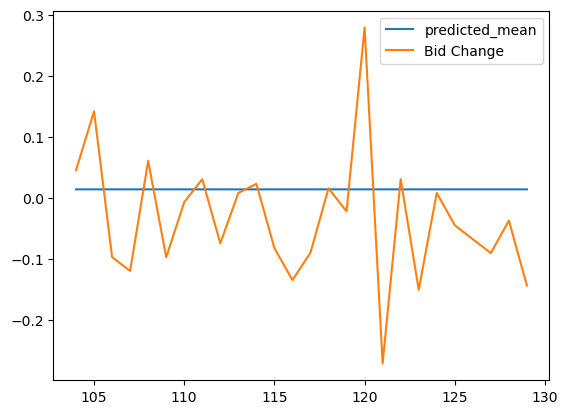

In [177]:
pred.plot(legend = True)
data_test['Bid Change'].plot(legend =True)